# PCA (dataset con ontología json-ld)

In [9]:
import pandas as pd
from pandas import read_csv

In [10]:
data = pd.read_csv('snd-dataset-from-json-ld.csv') # Dataset original
#data = pd.read_csv('snd-segmented-dataset-from-json-ld.csv')

data.head()

,Duration,Loudness,LogAttackTime,Tempo,Tempo.confidence,TemporalCentroid,Pitch,Pitch.confidence,Key,Key.confidence,Loop
0,24.688000,-9.428771,0.643956,122,0.150326,0.554729,150.475891,0.0,A minor,0.670985,False
1,9.743673,-15.724195,-1.538928,99,0.952932,0.515523,172.650284,0.0,A# major,0.545118,True
2,2.965000,-41.118546,-0.108449,98,0.000000,0.436209,1856.814087,0.0,C# minor,0.359346,False
3,212.834106,-13.990514,1.079394,94,0.661590,0.471911,233.854294,0.0,B major,0.878675,False
4,1.985306,-12.687588,-0.707071,125,0.000000,0.517171,269.756226,0.0,C major,0.736795,False


In [11]:
# 11 columnas de datos
data.shape

(1711, 11)

In [12]:
# Descarto columnas que no se van a usar por ahora
# Tip: axis number (0 for rows and 1 for columns)
data = data.drop("Tempo.confidence", axis=1);
data = data.drop("Pitch.confidence", axis=1);
data = data.drop("Key.confidence", axis=1);
data = data.drop("Loop", axis=1);

data.head()

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Key
0,24.688000,-9.428771,0.643956,122,0.554729,150.475891,A minor
1,9.743673,-15.724195,-1.538928,99,0.515523,172.650284,A# major
2,2.965000,-41.118546,-0.108449,98,0.436209,1856.814087,C# minor
3,212.834106,-13.990514,1.079394,94,0.471911,233.854294,B major
4,1.985306,-12.687588,-0.707071,125,0.517171,269.756226,C major


In [13]:
key_to_number_list = ['A minor', 'A major', 'A# minor', 'A# major', 'B minor', 'B major', 'C minor', 'C major', 'C# minor', 'C# major', 'D minor', 'D major', 'D# minor', 'D# major','E minor', 'E major', 'F minor', 'F major', 'F# minor', 'F# major', 'G minor', 'G major','G# minor', 'G# major']

def keyToNumber(x_value):
    return [i for i,x in enumerate(key_to_number_list) if x == x_value][0]

In [14]:
# test
keyToNumber('B minor')

4

In [15]:
# Mapeo de las tonalidades 'en texto' a categorias numéricas
data['Key'] = data['Key'].map(keyToNumber)

In [16]:
data.head()

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Key
0,24.688000,-9.428771,0.643956,122,0.554729,150.475891,0
1,9.743673,-15.724195,-1.538928,99,0.515523,172.650284,3
2,2.965000,-41.118546,-0.108449,98,0.436209,1856.814087,8
3,212.834106,-13.990514,1.079394,94,0.471911,233.854294,5
4,1.985306,-12.687588,-0.707071,125,0.517171,269.756226,7


In [17]:
X = data
#y = data["Key"]

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.n_components_

7

In [21]:
# Nota: En sklearn PCA esta implementado como una descomposición SVD
# Libro hands on ML, p.214 (chapter 8)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92422762, 0.0732374 ])

# Conclusión parcial

Hasta acá esta mal porque 'Key' es una variable categórica
y no se normalizaron los datos


# Rearmado

## Escalado de los datos (normalización)
Media = 0 y varianza = 1

    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html



In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np

X = data.drop('Key', axis=1)
X = data
X_scaled = scale(X, axis=0, with_mean=True, with_std=True, copy=True)

/home/hordia/VirtualEnvs/RedPanalDBAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


In [23]:
import pandas as pd
df = pd.DataFrame(X_scaled)

df.shape

(1711, 7)

In [24]:
df.head()

,0,1,2,3,4,5,6
0,-0.863956,0.980326,-0.274263,0.228131,0.775030,-0.274007,-1.569148
1,-0.958866,0.083658,-2.273533,-0.611371,0.213123,-0.233947,-1.148529
2,-1.001917,-3.533299,-0.963379,-0.647871,-0.923631,2.808588,-0.447497
3,0.330945,0.330590,0.124548,-0.793872,-0.411946,-0.123379,-0.868116
4,-1.008139,0.516167,-1.511648,0.337631,0.236739,-0.058520,-0.587703


In [25]:
# Nota: En sklearn PCA esta implementado como una descomposición SVD
# Libro hands on ML, p.214 (chapter 8)

pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# cantidad de componentes resultantes
pca.n_components_

7

In [27]:
# estos son los autovalores (ordenados de mayor a menor)
pca.explained_variance_

array([1.86825943, 1.12846829, 1.02609944, 0.9663424 , 0.80478083,
       0.75220448, 0.4579387 ])

In [28]:
avalores = pca.explained_variance_
avalores[0]/sum(avalores)

0.26673821651085294

In [29]:
# y esto muestra la 'variabilidad' que aporta cada componente
# (lo que representa en porcentaje)
pca.explained_variance_ratio_

array([0.26673822, 0.16111554, 0.14649996, 0.13796823, 0.1149015 ,
       0.10739498, 0.06538158])

In [30]:
# Y el acumulado agregando dimensiones
np.cumsum(pca.explained_variance_ratio_)

array([0.26673822, 0.42785375, 0.57435371, 0.71232195, 0.82722344,
       0.93461842, 1.        ])

# Conclusión

*Recién con 4 dimensiones tengo algo interesante*
Pero en realidad hacen falta 5 (82% de la representatividad)



### Ecuación del modelo



In [31]:
# componente 0
pca.components_.T[:,0]

array([ 0.56514967,  0.23616014,  0.60179984,  0.14406817,  0.41395542,
       -0.24782713, -0.09559384])

In [32]:
# componente 1 (autovector del autovalor 1)
pca.components_.T[:,1]

array([ 0.07359558, -0.64160527,  0.14065051,  0.00767842,  0.39245231,
        0.61941984, -0.15932702])

# Visualización

Text(0.5, 1.0, 'PCA: Representación de la proyección de los datos en 2 dimensiones')

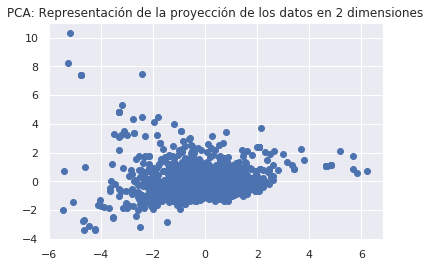

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
pca = PCA(n_components=2)
projected = pca.fit_transform(X_scaled)
plt.scatter(projected[:, 0], projected[:, 1])
plt.title("PCA: Representación de la proyección de los datos en 2 dimensiones")

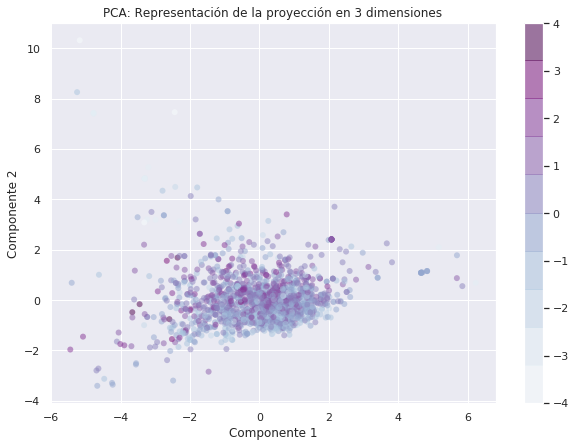

In [34]:
# 3 dimensiones representa el 60% de los datos
pca = PCA(n_components=3)
projected = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=projected[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.title("PCA: Representación de la proyección en 3 dimensiones")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();